# Name= Shubham Bhondve


# Project Name= Heart Disease Prediction using Machine Learning with Python. 

# Workflow:-
    Step1 = Getting the Heart Disease Data from the available resources.
    Step2 = Data pre processing.
    Step3 = Train Test Split.
    Step4 = Using the Logistic regression model.
    Step5 = Getting the Trained Logistic regression model.
    Step6 = Predicting that the person is healthy or have any heart disease. 

In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
#Loading the csv data to a Pandas dataframe.
df=pd.read_csv("c:\\Users\\Shubham\\heart_project.csv")
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# numberof rows and columns in dataset
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Statisctical measure about the data
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Checking for missing values
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

<AxesSubplot:>

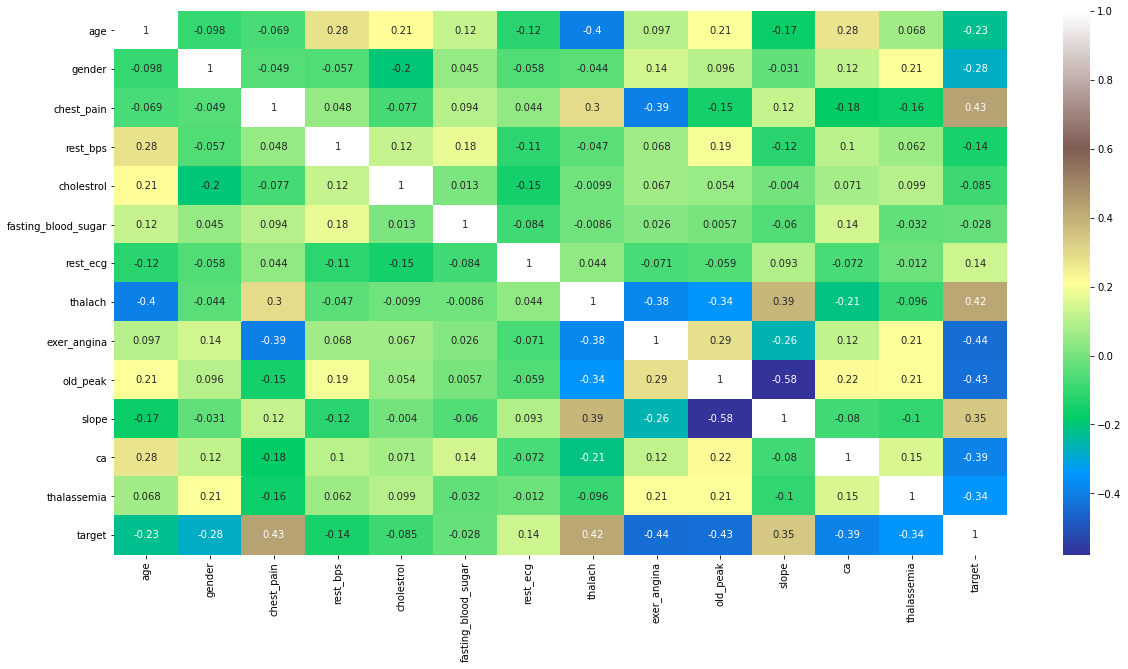

In [8]:
#finding the co-relations among the attributes
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True, cmap= 'terrain')

In [ ]:
Target is positively co-related with chest_pain, thalach, slope, rest_ecg .
Target is negatively co-related with age, gender, rest_bps, cholestrol, fasting_blood_sugar etc.

In [7]:
#Checking the distribution of target variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# 1  represents the person has a heart disease.


# 0  represents the person does not has a heart disease.

In [9]:
#Splitting the Features and Target Coulmns.
x = df.drop(columns = 'target', axis = 1)
y = df['target']

In [10]:
print(x)

     age  gender  chest_pain  rest_bps  cholestrol  fasting_blood_sugar  \
0     63       1           3       145         233                    1   
1     37       1           2       130         250                    0   
2     41       0           1       130         204                    0   
3     56       1           1       120         236                    0   
4     57       0           0       120         354                    0   
..   ...     ...         ...       ...         ...                  ...   
298   57       0           0       140         241                    0   
299   45       1           3       110         264                    0   
300   68       1           0       144         193                    1   
301   57       1           0       130         131                    0   
302   57       0           1       130         236                    0   

     rest_ecg  thalach  exer_angina  old_peak  slope  ca  thalassemia  
0           0      150     

In [11]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [15]:
#Splitting the data into Training Data and Test Data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, stratify = y, random_state=2)

In [16]:
#checking how much data is distributed
print(x.shape,x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


In [17]:
#Model Training
model = LogisticRegression()

In [18]:
#Traing the LogisticRegression model with training Data.
model.fit(x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
#accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [22]:
print('Accuracy on training data :' , training_data_accuracy)

Accuracy on training data : 0.8512396694214877


In [23]:
#accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [24]:
print('Accuracy on test data :' , test_data_accuracy)

Accuracy on test data : 0.819672131147541


In [27]:
#Building a predictive system
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)

#Change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data) 

#reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('The person does not has a heart disease')
else:
    print('The person does has a heart disease')

[1]
The person does has a heart disease
